# Introduction

In the previous notebook we have covered exclusively line plots, but matplotlib has many more options, of which we will feature a subset of the most relevant ones. Other modules such as seaborn will bring even more interesting and complex plots (eg: box plots), but let's focus on matplotlib first. 

# Main Plots

Before continuing, let's make the usual initialization:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

## Scatter

- [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter)

In the previous chapter we've actually done a scatter plot by setting the `ls` keyword argument to `''` using `plt.plot()`.

In [2]:
points = 100
x = np.random.random(points)
y = np.random.random(points)

Text(0.5, 1.0, "Scatter plot using 'plot'")

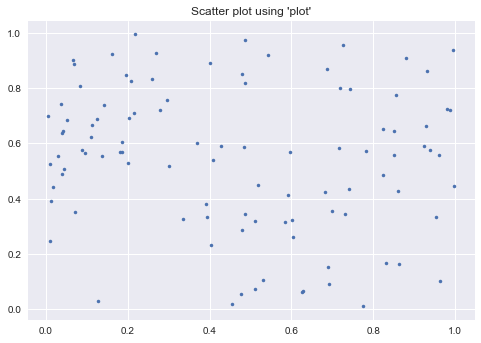

In [3]:
plt.plot(x, y, ls='', marker=".")
plt.title("Scatter plot using 'plot'")

There are cases where doing this is preferable to using an actual scatter plot, because as the data set grows larger, the performance of `plot` becomes noticibly better. This can be explained by the scatter plot creating individual markers for every point, whilst the regular plot simply copies the same marker for every point.

But when you need to costumize the size or color of each marker, the scatter plot is the ideal tool.

In [4]:
size = abs(np.random.randn(points)) * 500
colors = np.random.rand(points, 3)  # An array of (r, g, b) values

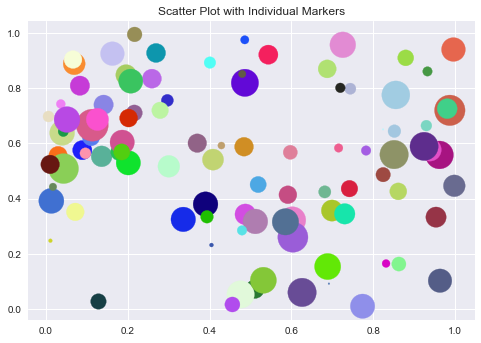

In [5]:
plt.scatter(x, y, c=colors, s=size)
plt.title('Scatter Plot with Individual Markers');

But let's say we don't want to specify the color individually, but wanted a nice gradient that varies according to the size of the marker? We can look into colormaps to solve this issue. By default, matplotlib has various colormaps available (once again, check the [official cheatsheet](https://github.com/matplotlib/cheatsheets)). This can be incredibly useful for the graphs where we are showing the density of population, for example.

By specifying the color of every point individually we needed to specify the color in any of the formats supported by matplotlib. When using colormaps however, every color must be a single float value between 0 and 1.

We can still customize other aspects of the marker, such as the color of the edge (if any) through the `edgecolors` keyword argument or the width of said line with `linewidths`. These values can either be a single value to be applied to every marker or an arary of values to be applied to every marker individually.

When the density of the plot starts to increase however, markers overlap and we lose information. To silve this problem, we can use the `alpha` keyword argument which controls the transparency of every marker.

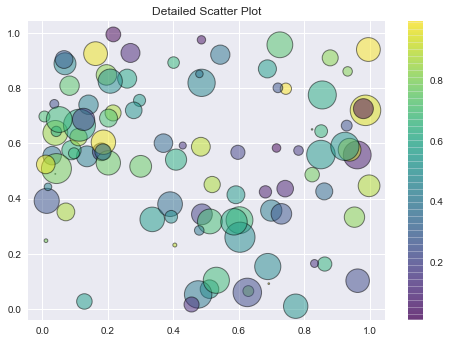

In [6]:
colors = np.random.random(points)

plt.scatter(x, y, c=colors, s=size, cmap='viridis', alpha=0.5, edgecolors='k', linewidths=1)
plt.colorbar()
plt.title('Detailed Scatter Plot');

## Errorbar

- [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.errorbar.html?highlight=errorbar#matplotlib.axes.Axes.errorbar)

Errorbar plots can be used to show the error associated to each value (eg: values measured with innate uncertainty).

The errorbar plot accepts two new important arguments: `xerr` and `yerr`, which represent the error associated with either the x-axis or y-axis. These arguments can take various forms:
- scalar: Symmetric +/- values for all data points.
- shape(N,): Symmetric +/-values for each data point.
- shape(2, N): Separate - and + values for each bar. First row contains the lower errors, the second row contains the upper errors.
- None: No errorbar.



In [7]:
x = np.linspace(0, 9, 10)
y = 6 + np.random.randn(10)
y2 = 2 + np.random.randn(10)

yerr = np.random.randn(10)
yerr2 = np.random.rand(2, 10)

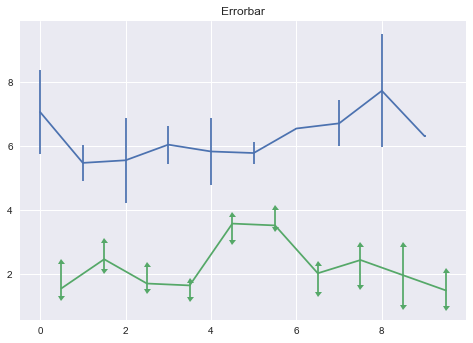

In [8]:
plt.errorbar(x, y, yerr=yerr)
plt.errorbar(x + 0.5, y2, yerr=yerr2, lolims=True, uplims=True)
plt.title('Errorbar');

## Step

- [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.step.html#matplotlib.axes.Axes.step)

This plot is incredibly useful for digital signals, and the point when the step is made can be changed through the `where` keyword argument, which can take 3 different values:
- `'pre'`: The y value is continued constantly to the left from every x position, i.e. the interval (x[i-1], x[i]] has the value y[i]
- `'post'`: The y value is continued constantly to the right from every x position, i.e. the interval [x[i], x[i+1]) has the value y[i]
- `'mid'`: Steps occur half-way between the x positions

The default value is `'pre'`.


In [9]:
x = np.linspace(0, 19, 20)
y = np.random.randint(0, 2, 20) - 0.5

Text(0, 0.5, 'Voltage (mV)')

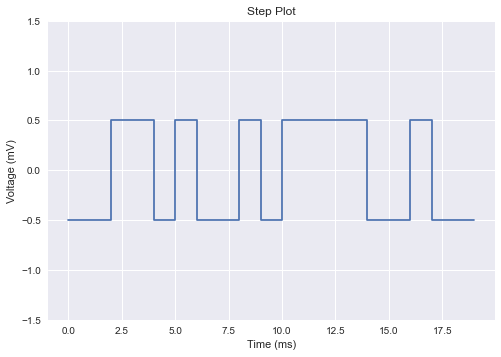

In [10]:
plt.step(x, y, where='post')
plt.ylim(-1.5, 1.5)
plt.title('Step Plot')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')

slices = np.random.random(5)
labels = ['A', 'B', 'C', 'D', 'E']
explode = np.zeros(5)
explode[1] = 0.05## Pie

- [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html#matplotlib.axes.Axes.pie)

Although pie charts are hated throughout the world os statistics, they can produce a very pleasant chart for ocasions where statistical accuracy is key.

Some of the most used keyword arguments are:
- `labeldistance`: controls the position of the labels relative to the center and defaults to 1.1
- `explode`: accepts a list of floats indicating an offset for each slice
- `autopct`: accepts a format string or a function and writes the result in the middle of the respective slice

In [11]:
slices = np.random.random(5)
labels = ['A', 'B', 'C', 'D', 'E']
explode = np.zeros(5)
explode[1] = 0.05

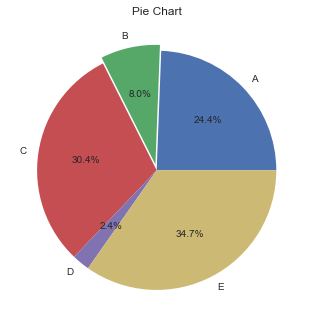

In [12]:
plt.pie(slices, labels=labels, labeldistance=1.1, explode=explode, autopct='%1.1f%%')
plt.title('Pie Chart');

## Stack

- [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.stackplot.html#matplotlib.axes.Axes.stackplot)

Stack plots are useful whenever you are interested in both the individual values but also on their cumulative sum.

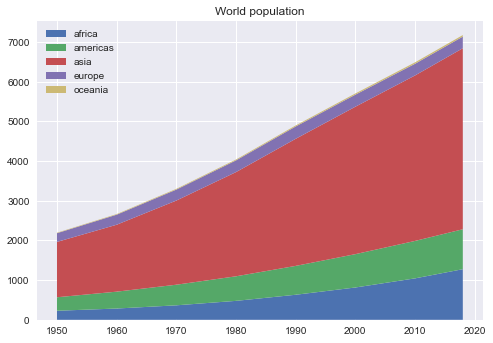

In [13]:
# data from United Nations World Population Prospects (Revision 2019)
# https://population.un.org/wpp/, license: CC BY 3.0 IGO
year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
population_by_continent = {
    'africa': [228, 284, 365, 477, 631, 814, 1044, 1275],
    'americas': [340, 425, 519, 619, 727, 840, 943, 1006],
    'asia': [1394, 1686, 2120, 2625, 3202, 3714, 4169, 4560],
    'europe': [220, 253, 276, 295, 310, 303, 294, 293],
    'oceania': [12, 15, 19, 22, 26, 31, 36, 39],
}

plt.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys())
plt.legend(loc='upper left')
plt.title('World population');

## Boxplot

- [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot)

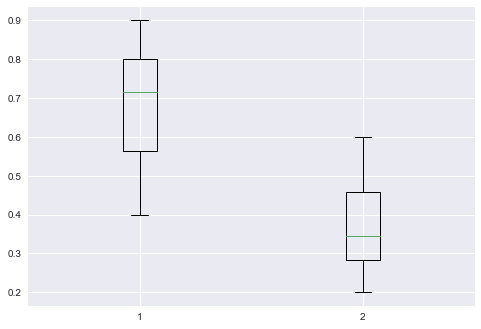

In [14]:
x = np.array([
    [0.65, 0.45, 0.6, 0.8, 0.9, 0.78, 0.4, 0.8],
    [0.2, 0.45, 0.6, 0.23, 0.34, 0.3, 0.35, 0.48]
]).T

plt.boxplot(x, notch=False, sym=None);

### Histogram vs Bar graph

At first glance they both appear to fill similar roles, however they serve very distinct roles. Histograms are meant to display ranges of numerical data (continuous ranges) whilst the bar graphs are meant to compare data aggregated by categories. Here's a list of some characteristics to help distinguish these two kinds of graphs:

| Comparison | Histogram | Bar Graph |
| ---------: | :-------: | :-------: |
| Purpuose   | Display the frequency of numerical data | Compare different categories of data |
| Indicates  | Distribution of non-discrete variables | Distribution of discrete variables |
| Presents   | Quantitative Data | Categorical Data |
| Spaces     | Bars must touch each other | Bars must not touch each other |
| Can reorder bars?  | No | Yes |
| Width of bars | Can be different | Must be constant |

## Bar

- [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html#matplotlib.axes.Axes.bar)
- [Horizontal Bar Documenation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.barh.html#matplotlib.axes.Axes.barh)

The bar plot accepts the position of each bar and its respective height, but we can costumize other parameters via keyword arguments:
- `width`: Control the width of either all bars with a float value or of each bar with an array (default is 0.8)
- `bottom`: Control the y coordinate of all bars with a float value or of each bar with an array (default is 0)
- `align`: Align the bars to the x coordinate, can be one of two values (default 'center'):
    - `'center'`: Center the base on the x positions
    - `'edge'`: Align the left edges of the bars with the x positions

*Note:* To align to the right, pass a negative width and `align='edge'`.

There is also a horizontal version of this plot named `plt.barh()`.

In [15]:
x = np.linspace(0, 19, 20)
height = np.random.random(20)

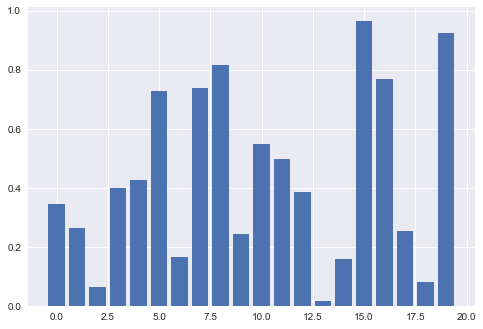

In [16]:
plt.bar(x, height);

Bar plots are usually used for categorical data however, and many times such data does not have a numerical equivalent. Bar plot's x array supports other data types beyond numerical, such as strings.

<BarContainer object of 4 artists>

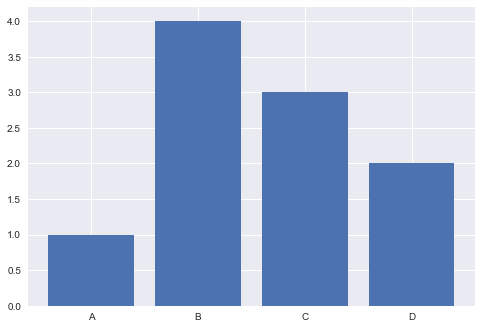

In [17]:
plt.bar(['A', 'B', 'C', 'D'], [1, 4, 3, 2])

## Histogram

- [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist)

Histograms are incredibly useful to show the distribution of non-discrete values, as such we will be using a normal distribution to show this plot.

The histogram has many interesting arguments, here are some of the most useful ones:
- `bins`: This controls the number (and width) of each bin:
    - Given an integer value it will define the number of equal-sized bins
    - Given an array, it will control both the number and width of the bins
- `density`: Passing True draws and returns a probability density, dividing the value by the number of bins, so that the area under the histogram integrates to 1
- `cumulative`: This will make each bin count with the size of the previous bins. If `density` is also enabled it will guaratee that the last bin has value of 1
    - Passing True or a positive number enables this
    - Passing False or 0 is the default behaviour
    - Passing a negative number will make the bins accumulate in the reverse order
- `weights`: An array with the same length as the x array, which will control how much each x value contributes to a bin (by default every item counts by 1)
- `range`: Receives a tuple (xmin, xmax) which controls which points to ignore. This allows us to easily ignore outliers
- `orientation`: Either `'horizontal'` or `'vertical'`, controls the direction of the plot


In [18]:
x = np.random.randn(10000)
x_normal_dist = np.linspace(-3.5, 3.5, 50)

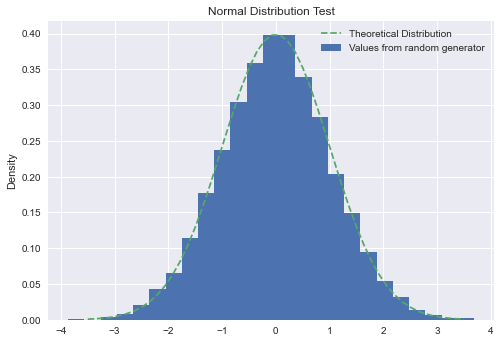

In [19]:
plt.hist(x, bins=25, density=True, label='Values from random generator')
plt.plot(x_normal_dist, 1 / np.sqrt(2*np.pi) * np.exp(-(x_normal_dist**2)/2), ls='--', label='Theoretical Distribution') # Formula for normal dist
plt.title('Normal Distribution Test')
plt.ylabel('Density')
plt.legend();

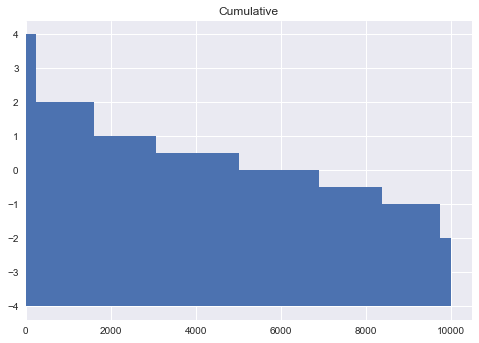

In [20]:
plt.hist(x, bins=[-4, -2, -1, -.5, 0, .5, 1, 2, 4], cumulative=-1, orientation='horizontal')
plt.title('Cumulative');

# Other useful concepts

## Plotting Dates

- [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot_date.html#matplotlib.axes.Axes.plot_date)

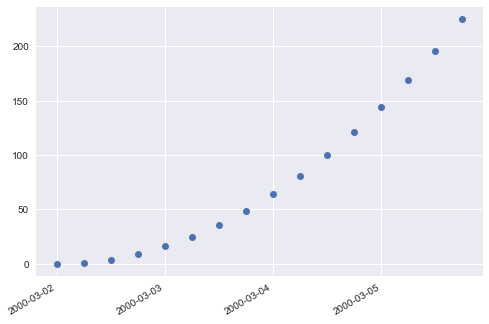

In [21]:
# Example taken from matplotlib: https://matplotlib.org/stable/gallery/ticks_and_spines/date_demo_convert.html#sphx-glr-gallery-ticks-and-spines-date-demo-convert-py

import datetime
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange

date1 = datetime.datetime(2000, 3, 2)
date2 = datetime.datetime(2000, 3, 6)
delta = datetime.timedelta(hours=6)
dates = drange(date1, date2, delta)

y = np.arange(len(dates))

fig, ax = plt.subplots()
ax.plot_date(dates, y ** 2)

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_minor_locator(HourLocator(range(0, 25, 6)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')
fig.autofmt_xdate()